### Importing the necessary Libaries 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy import stats
import re


### Loading the Dataset 

In [3]:
df = pd.read_csv("Airline_Review (1).csv")

### The shape showing the number of rows and colunms in the Dataset 

In [4]:
df.shape

(3580, 9)

### The Head of the Dataset showing the first few rows and the colunms headers 

In [107]:

df.head()

,Passanger_Name,Flying_month,Route,Rating,Review_title,Review_content,Traveller_type,Class
0,Paige Boet,Jun-23,New Orleans to London,1.0,The airline lost my luggage,The airline lost my luggage and was absolutely...,Solo Leisure,Economy Class
1,S Layne,Mar-23,London to Amman,1.0,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",Couple Leisure,Business Class
2,E Lanewoski,May-19,Heathrow to Bodrum,2.0,no boarding drinks provided,"First time flying with BA business class, neve...",Solo Leisure,Business Class
3,Joel Burman,Jun-23,Amman to London,4.0,WiFi didn't work,You can buy sandwiches and crisps but don't ex...,Solo Leisure,Economy Class
4,R Vines,Jul-17,London City to Ibiza,7.0,stick with economy,This is a two-for-one review covering economy ...,Family Leisure,Business Class


### The tail of the Dataset showing the last few rows and the colunms headers 

In [69]:
df.tail()

,Passanger_Name,Flying_month,Route,Rating,Verified,Review_title,Review_content,Traveller_type,Class
3575,W Benson,NaN,NaN,4.0,NaN,British Airways customer review,LHR-HKG on Boeing 747 - 23/08/12. Much has bee...,Economy Class,no
3576,S Luqman,NaN,NaN,4.0,NaN,British Airways customer review,Just got back from Bridgetown Barbados flying ...,Economy Class,no
3577,D Smith,NaN,NaN,4.0,NaN,British Airways customer review,LHR-JFK-LAX-LHR. Check in was ok apart from be...,Economy Class,no
3578,W Benson,NaN,NaN,6.0,NaN,British Airways customer review,HKG-LHR in New Club World on Boeing 777-300 - ...,Business Class,yes
3579,Michael Dielissen,NaN,NaN,8.0,NaN,British Airways customer review,YYZ to LHR - July 2012 - I flew overnight in p...,Premium Economy,yes


### Info provides DataFrame's structure and content

In [70]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3580 entries, 0 to 3579
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Passanger_Name  3580 non-null   object 
 1   Flying_month    2815 non-null   object 
 2   Route           2816 non-null   object 
 3   Rating          3575 non-null   float64
 4   Verified        1270 non-null   object 
 5   Review_title    3580 non-null   object 
 6   Review_content  3580 non-null   object 
 7   Traveller_type  3580 non-null   object 
 8   Class           3579 non-null   object 
dtypes: float64(1), object(8)
memory usage: 251.8+ KB


### Descriptive statistics of numerical columns. 

In [71]:
df.describe()

,Rating
count,3575.000000
mean,4.790490
std,3.170323
min,1.000000
25%,2.000000
50%,4.000000
75%,8.000000
max,10.000000


### Descriptive statistics of categorical variable.

In [72]:
df.describe(include='object')

,Passanger_Name,Flying_month,Route,Verified,Review_title,Review_content,Traveller_type,Class
count,3580,2815,2816,1270,3580,3580,3580,3579
unique,2764,1174,744,2,2570,3506,203,13
top,David Ellis,Aug-15,Economy Class,Trip Verified,British Airways customer review,I really do not have the energy to write very ...,A320,Economy Class
freq,44,25,846,1067,952,2,342,676


### Checking for missing values

In [73]:
df.isnull().sum()

Passanger_Name       0
Flying_month       765
Route              764
Rating               5
Verified          2310
Review_title         0
Review_content       0
Traveller_type       0
Class                1
dtype: int64

### Data Cleaning 

### Checking for duplicate rows

In [74]:

df.duplicated().sum()

74

### Removing Duplicates

In [75]:

df = df.drop_duplicates()

### Creating a New Column for Airplane Models:

In [77]:

known_traveller_types = ['Solo Leisure', 'Couple Leisure', 'Family Leisure', 'Business', 
                         'Business Class', 'First Class', 'Economy Class', 'Premium Economy', 'Various', 'no']


df['Airplane_Model'] = df['Traveller_type'].apply(lambda x: x if x not in known_traveller_types else None)
df['Traveller_type'] = df['Traveller_type'].apply(lambda x: x if x in known_traveller_types else None)



### Moving Class Information to the Correct Columns:

In [78]:
known_flight_classes = ['Economy Class', 'Business Class', 'First Class', 'Premium Economy']


for index, row in df.iterrows():
    
    if row['Traveller_type'] in known_flight_classes:
        df.at[index, 'Class'] = row['Traveller_type']
        df.at[index, 'Traveller_type'] = None

 
    if row['Class'] not in known_flight_classes:
        if pd.isna(row['Traveller_type']):
            df.at[index, 'Traveller_type'] = row['Class']
        df.at[index, 'Class'] = None


### Moving information from route to class colunms 

In [79]:


classes_to_move = ['Economy Class', 'Business Class', 'Premium Economy', 'First Class']

for flight_class in classes_to_move:
 
    mask = (df['Route'] == flight_class) & (df['Class'].isnull() | (df['Class'] == 0))
    df.loc[mask, 'Class'] = df.loc[mask, 'Route']
    df.loc[mask, 'Route'] = None 

### Moving date information from route column to a new column called date 

In [80]:


def extract_month_year(s):
    if isinstance(s, str):
       
        matches = re.findall(r'\b(?:Jan(?:uary)?|Feb(?:ruary)?|Mar(?:ch)?|Apr(?:il)?|May|Jun(?:e)?'
                             r'|Jul(?:y)?|Aug(?:ust)?|Sep(?:tember)?|Oct(?:ober)?|Nov(?:ember)?'
                             r'|Dec(?:ember)?)\b-\d{2,4}', s, flags=re.IGNORECASE)
        if matches:
            return matches[0]  
    return None


df['Date'] = df['Route'].apply(extract_month_year)

df['Route'] = df['Route'].apply(lambda x: re.sub(r'\b(?:Jan(?:uary)?|Feb(?:ruary)?|Mar(?:ch)?|Apr(?:il)?|May|Jun(?:e)?'
                                                 r'|Jul(?:y)?|Aug(?:ust)?|Sep(?:tember)?|Oct(?:ober)?|Nov(?:ember)?'
                                                 r'|Dec(?:ember)?)\b-\d{2,4}', '', x).strip() if isinstance(x, str) else x)



### Moving yes/no from the route colunm to a new colunm titled yes and No 

In [81]:

df['Yes/No'] = df['Route'].apply(lambda x: x if x in ['yes', 'no'] else None)

df['Route'] = df['Route'].apply(lambda x: None if x in ['yes', 'no'] else x)


### Moving route information from fly_month to route 

In [82]:

df['Route'] = df.apply(lambda row: row['Flying_month'] if pd.isna(row['Route']) and row['Flying_month'] not in ['yes', 'no'] else row['Route'], axis=1)

df['Flying_month'] = df.apply(lambda row: None if row['Route'] == row['Flying_month'] else row['Flying_month'], axis=1)


###  Move 'yes' and 'no' from 'Flying_month' to a new column 'Route Yes/No'

In [83]:

df['Route Yes/No'] = df['Flying_month'].apply(lambda x: x if x in ['yes', 'no'] else None)

df['Flying_month'] = df['Flying_month'].apply(lambda x: None if x in ['yes', 'no'] else x)



### Move the date information from the 'Date' column to the 'Flying_month' column

In [84]:

df['Flying_month'] = df.apply(lambda row: row['Date'] if pd.isna(row['Flying_month']) and pd.notna(row['Date']) else row['Flying_month'], axis=1)




### Removing 'no' and 'various' from the 'Traveller_type' column

In [85]:

df['Traveller_type'] = df['Traveller_type'].replace(['no', 'Various'], [None, None])



### Dropping the colunms used in cleaning the Dataset

In [86]:

columns_to_drop = ['Yes/No', 'Route Yes/No','Airplane_Model','Date']

df = df.drop(columns=columns_to_drop)


### Checking if the drop colunms were dropped 

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3506 entries, 0 to 3579
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Passanger_Name  3506 non-null   object 
 1   Flying_month    955 non-null    object 
 2   Route           2812 non-null   object 
 3   Rating          3501 non-null   float64
 4   Verified        1270 non-null   object 
 5   Review_title    3506 non-null   object 
 6   Review_content  3506 non-null   object 
 7   Traveller_type  2811 non-null   object 
 8   Class           2811 non-null   object 
dtypes: float64(1), object(8)
memory usage: 402.9+ KB


### Using the head function to check if all the data cleaning process were effected 

In [88]:
df.head()

,Passanger_Name,Flying_month,Route,Rating,Verified,Review_title,Review_content,Traveller_type,Class
0,Paige Boet,Jun-23,New Orleans to London,1.0,Trip Verified,The airline lost my luggage,The airline lost my luggage and was absolutely...,Solo Leisure,Economy Class
1,S Layne,Mar-23,London to Amman,1.0,Trip Verified,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",Couple Leisure,Business Class
2,E Lanewoski,None,Heathrow to Bodrum,2.0,Trip Verified,no boarding drinks provided,"First time flying with BA business class, neve...",Solo Leisure,Business Class
3,Joel Burman,Jun-23,Amman to London,4.0,Not Verified,WiFi didn't work,You can buy sandwiches and crisps but don't ex...,Solo Leisure,Economy Class
4,R Vines,None,London City to Ibiza,7.0,Trip Verified,stick with economy,This is a two-for-one review covering economy ...,Family Leisure,Business Class


### Checking for the missing values left after some data cleaning has been effected 

In [89]:
df.isnull().sum()

Passanger_Name       0
Flying_month      2551
Route              694
Rating               5
Verified          2236
Review_title         0
Review_content       0
Traveller_type     695
Class              695
dtype: int64

In [90]:
df.to_csv('damilola.csv', index=False)


###  Imputing missing values for 'Route' with the mode

In [91]:
route_mode = df['Route'].mode()[0]
df['Route'].fillna(route_mode, inplace=True)


### Imputing missing rating with mode 

In [92]:
rating_mode =df['Rating'].mode()[0]
df['Rating'].fillna(rating_mode, inplace=True)

 ### Imputing missing values for 'Traveller_type' with the mode

In [93]:
traveller_type_mode = df['Traveller_type'].mode()[0]
df['Traveller_type'].fillna(traveller_type_mode, inplace=True)


### Imputing missing values for 'Class' with the mode

In [94]:
class_mode = df['Class'].mode()[0]
df['Class'].fillna(class_mode, inplace=True)


### Dropping the 'Verified' column

In [95]:
df.drop('Verified', inplace=True, axis=1)


###  Distributing missing values evenly across existing months for 'Flying_month'

In [96]:

month_distribution = df['Flying_month'].value_counts(normalize=True)
months = month_distribution.index.tolist()
probabilities = month_distribution.tolist()

df['Flying_month'] = df['Flying_month'].apply(
    lambda x: np.random.choice(months, p=probabilities) if pd.isnull(x) else x
)


### Checking is all the missing values has been replaced

In [97]:
df.isnull().sum()

Passanger_Name    0
Flying_month      0
Route             0
Rating            0
Review_title      0
Review_content    0
Traveller_type    0
Class             0
dtype: int64

 # Exploratory Data Analysis 

### question 1: Identify the factors affecting customer choices.

### Calculate Average Ratings by Route, Traveller Type, and Class

In [98]:
average_rating_by_route = df.groupby('Route')['Rating'].mean().sort_values(ascending=False)
average_rating_by_traveller_type = df.groupby('Traveller_type')['Rating'].mean().sort_values(ascending=False)
average_rating_by_class = df.groupby('Class')['Rating'].mean().sort_values(ascending=False)


### Graph for Top & Bottom 10 Routes by Average Rating

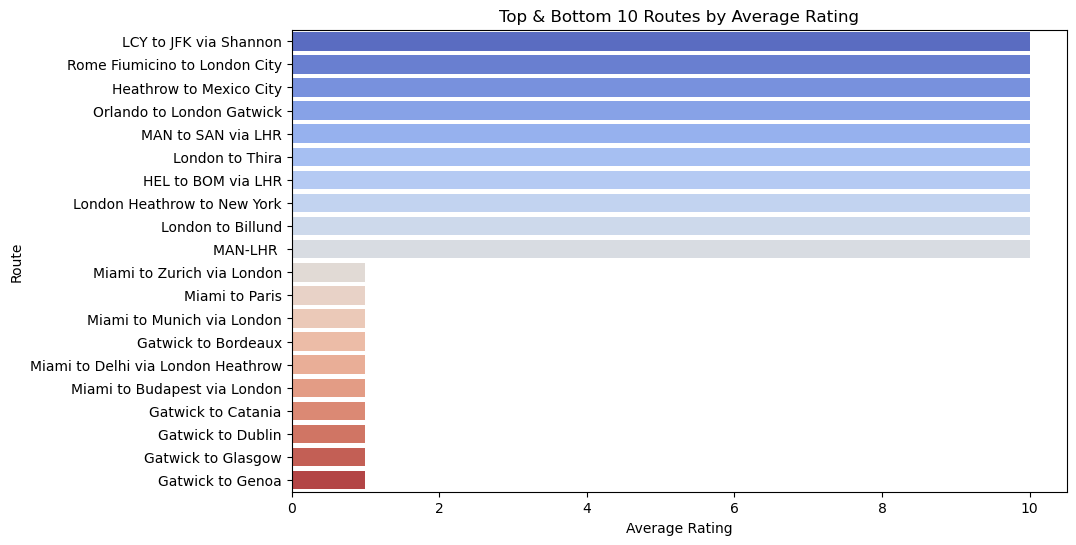

In [99]:

top_bottom_routes = pd.concat([average_rating_by_route.head(10), average_rating_by_route.tail(10)])
plt.figure(figsize=(10, 6))
sns.barplot(x=top_bottom_routes.values, y=top_bottom_routes.index, palette="coolwarm")
plt.title('Top & Bottom 10 Routes by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Route')
plt.show()


 ### Graph for Average Rating by Traveller Type

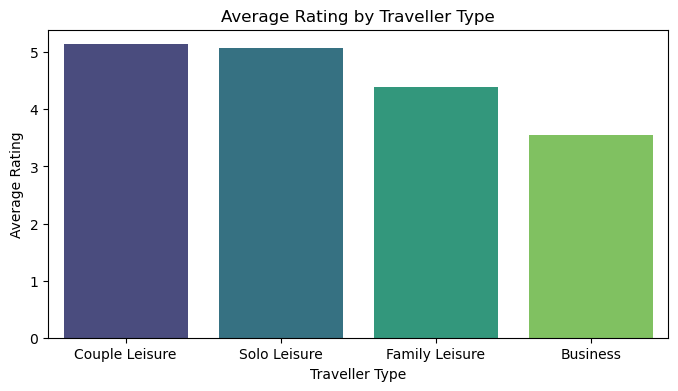

In [100]:

plt.figure(figsize=(8, 4))
sns.barplot(x=average_rating_by_traveller_type.index, y=average_rating_by_traveller_type.values, palette="viridis")
plt.title('Average Rating by Traveller Type')
plt.xlabel('Traveller Type')
plt.ylabel('Average Rating')
plt.show()


### Graph for Average Rating by Class

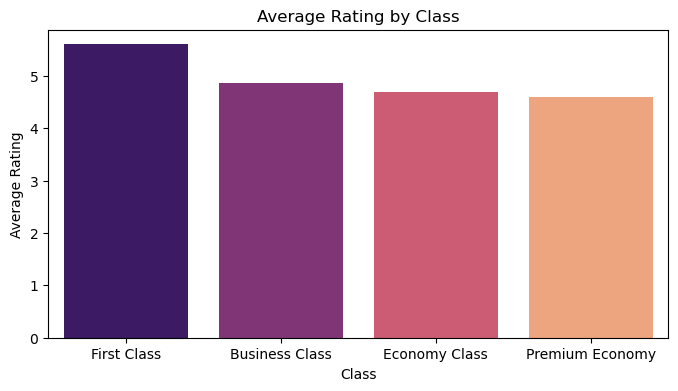

In [60]:

plt.figure(figsize=(8, 4))
sns.barplot(x=average_rating_by_class.index, y=average_rating_by_class.values, palette="magma")
plt.title('Average Rating by Class')
plt.xlabel('Class')
plt.ylabel('Average Rating')
plt.show()

### 2.  Evaluate the influence of holiday booking time on customer behaviour.

In [104]:

from pandas.tseries.offsets import MonthEnd
import datetime


# Convert 'Flying_month' to standard Python strings
df['Flying_month'] = df['Flying_month'].astype(str)

# Now, convert 'Flying_month' to datetime format with specific format
df['Flying_month'] = pd.to_datetime(df['Flying_month'], format='%b-%y') + MonthEnd(0)

# Extract month from the 'Flying_month' column
df['Month'] = df['Flying_month'].dt.month

# Group by 'Month' and calculate average rating
monthly_avg_ratings = df.groupby('Month')['Rating'].mean().reset_index()

# Convert the numeric month to month names for better readability
monthly_avg_ratings['Month'] = monthly_avg_ratings['Month'].apply(lambda x: datetime.datetime(1900, x, 1).strftime('%B'))

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_avg_ratings, x='Month', y='Rating', palette="viridis")
plt.title('Average Customer Rating by Month (Irrespective of Year)')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

# Show the plot
plt.show()


TypeError: Expected unicode, got numpy.str_

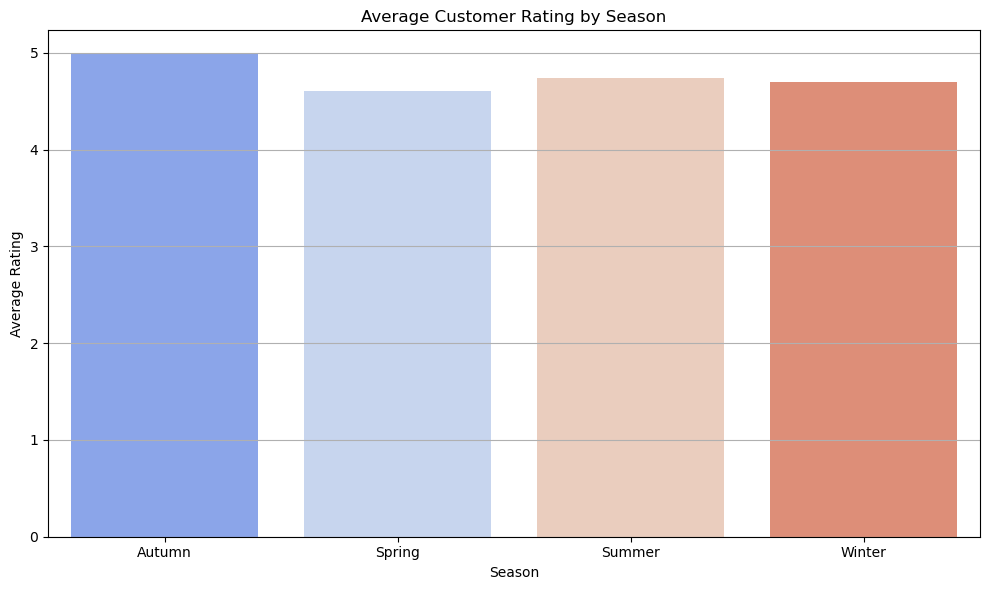

In [65]:

df['Flying_month'] = pd.to_datetime(df['Flying_month'], format='%b-%y') + pd.tseries.offsets.MonthEnd(0)

def categorize_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:  # 9, 10, 11
        return 'Autumn'

df['Season'] = df['Flying_month'].dt.month.apply(categorize_season)


seasonal_ratings = df.groupby('Season')['Rating'].mean().reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(data=seasonal_ratings, x='Season', y='Rating', palette="coolwarm")
plt.title('Average Customer Rating by Season')
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.grid(axis='y')
plt.tight_layout()


plt.show()


### 3. Predict the likelihood of a successful holiday booking based on customer characteristics

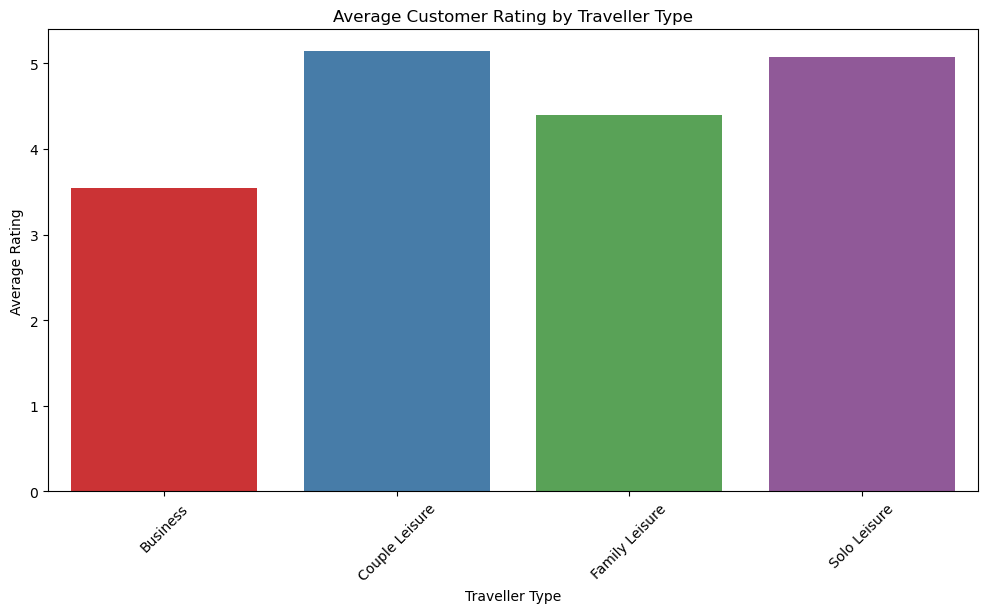

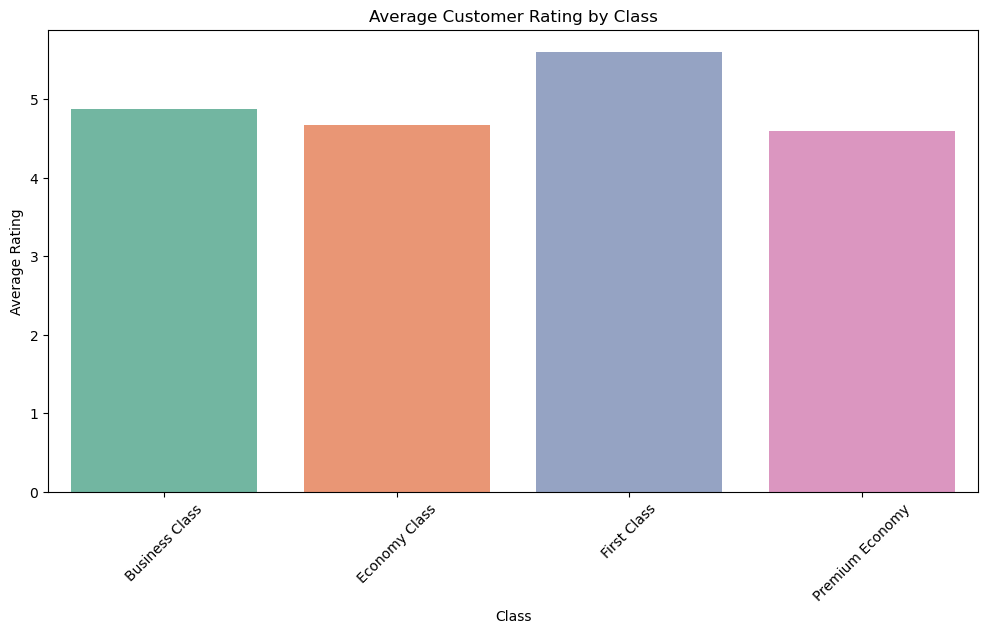

In [66]:

avg_rating_by_traveller_type = df.groupby('Traveller_type')['Rating'].mean().reset_index()

avg_rating_by_class = df.groupby('Class')['Rating'].mean().reset_index()


plt.figure(figsize=(12, 6))
sns.barplot(data=avg_rating_by_traveller_type, x='Traveller_type', y='Rating', palette='Set1')
plt.title('Average Customer Rating by Traveller Type')
plt.xlabel('Traveller Type')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(12, 6))
sns.barplot(data=avg_rating_by_class, x='Class', y='Rating', palette='Set2')
plt.title('Average Customer Rating by Class')
plt.xlabel('Class')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()


### 4. Investigate the popularity of various routes and flight schedules.


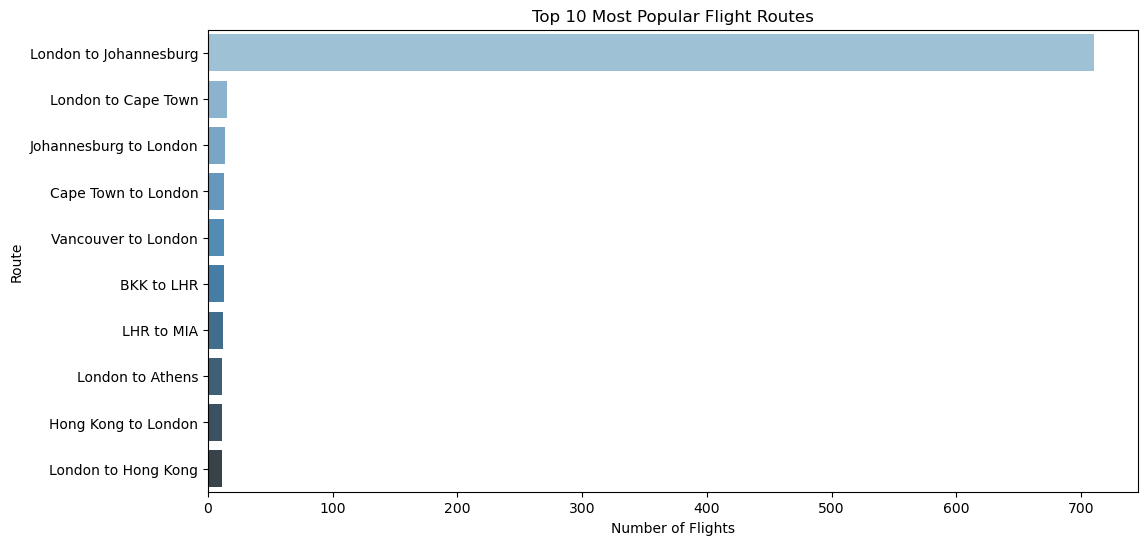

In [68]:

route_popularity = df['Route'].value_counts().reset_index()
route_popularity.columns = ['Route', 'Count']


top_routes = route_popularity.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_routes, x='Count', y='Route', palette='Blues_d')
plt.title('Top 10 Most Popular Flight Routes')
plt.xlabel('Number of Flights')
plt.ylabel('Route')
plt.show()


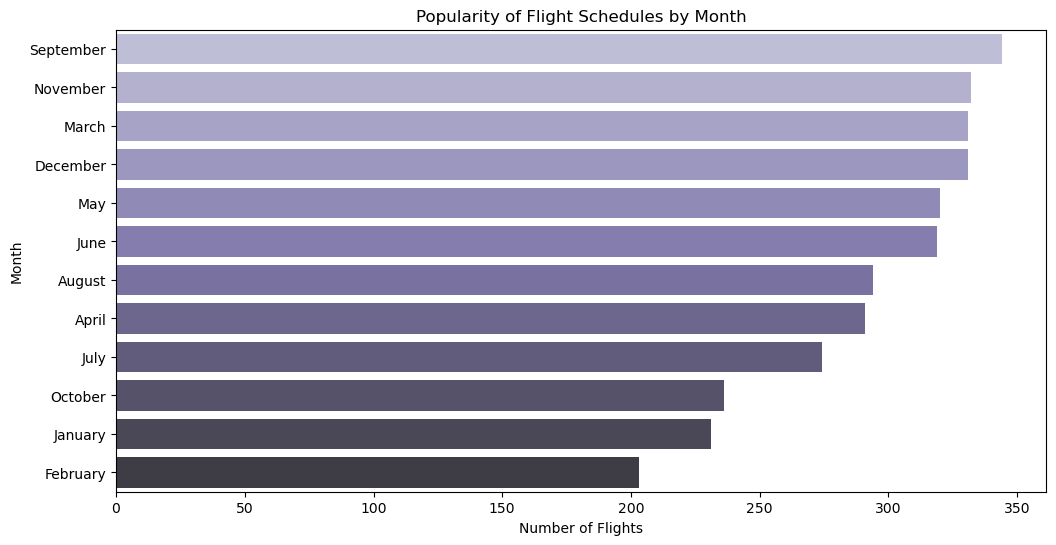

In [69]:

df['Flying_month'] = pd.to_datetime(df['Flying_month'], format='%b-%y') + pd.tseries.offsets.MonthEnd(0)


df['Month'] = df['Flying_month'].dt.month_name()


month_popularity = df['Month'].value_counts().reset_index()
month_popularity.columns = ['Month', 'Count']


plt.figure(figsize=(12, 6))
sns.barplot(data=month_popularity, x='Count', y='Month', palette='Purples_d', order=month_popularity.sort_values('Count', ascending=False)['Month'])
plt.title('Popularity of Flight Schedules by Month')
plt.xlabel('Number of Flights')
plt.ylabel('Month')
plt.show()


### Distribution of Customer Ratings  

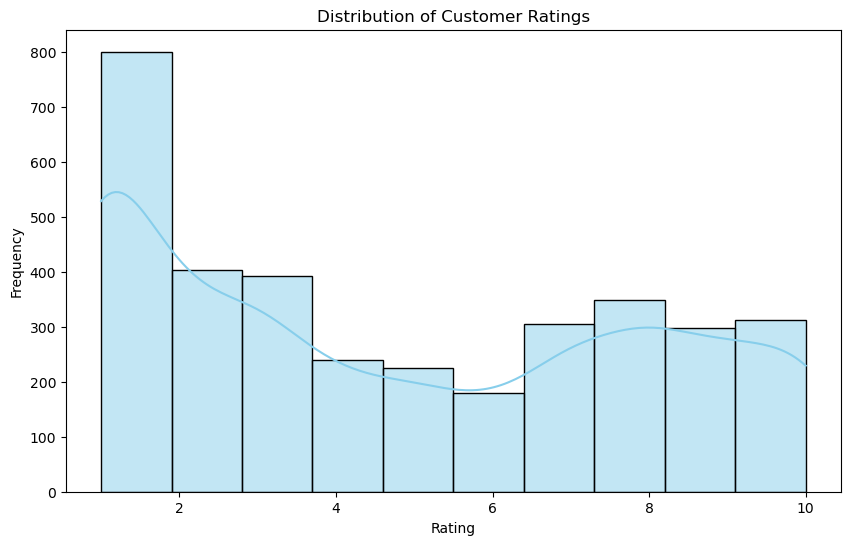

In [70]:

# Convert 'Flying_month' to datetime format
df['Flying_month'] = pd.to_datetime(df['Flying_month'], format='%b-%y') + pd.tseries.offsets.MonthEnd(0)

# Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Customer Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


### Distribution of Traveler Types 

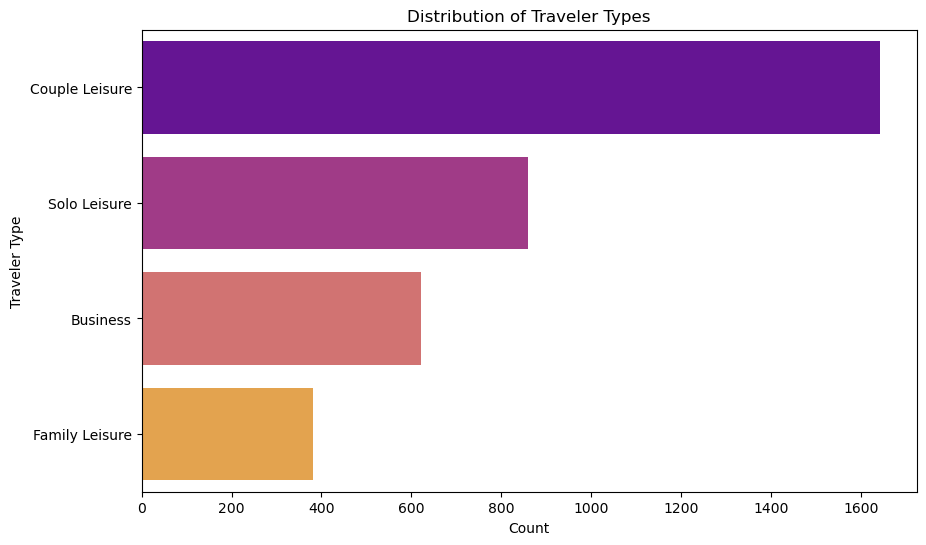

In [71]:

df['Flying_month'] = pd.to_datetime(df['Flying_month'], format='%b-%y') + pd.tseries.offsets.MonthEnd(0)


traveler_type_counts = df['Traveller_type'].value_counts().reset_index()
traveler_type_counts.columns = ['Traveller Type', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Traveller Type', data=traveler_type_counts, palette='plasma')
plt.title('Distribution of Traveler Types')
plt.xlabel('Count')
plt.ylabel('Traveler Type')
plt.show()


### Correlation Matrix of Rating'

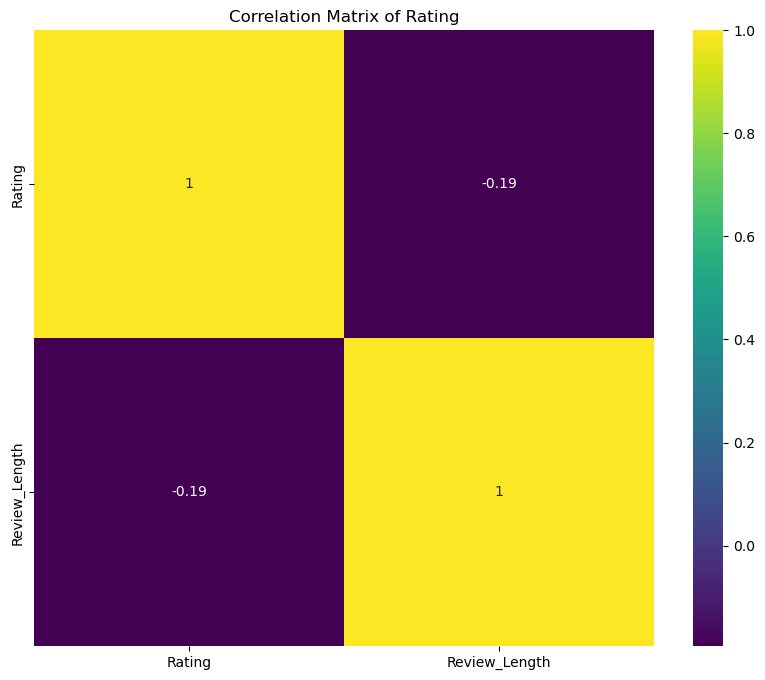

In [76]:

numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix of Rating')
plt.show()


### Research Questions 

## Research Question 1
### Question: Is there a significant difference in ratings between Business Class and Economy Class?
### Null Hypothesis (H0): There is no significant difference in ratings between Business Class and Economy Class passengers.
### Alternative Hypothesis (H1): There is a significant difference in ratings between Business Class and Economy Class passengers.


In [80]:
from scipy.stats import ttest_ind

business_class_ratings = df[df['Class'] == 'Business Class']['Rating']
economy_class_ratings = df[df['Class'] == 'Economy Class']['Rating']


ttest_result_1 = ttest_ind(business_class_ratings, economy_class_ratings, nan_policy='omit')


print(ttest_result_1)


TtestResult(statistic=1.5146173790609367, pvalue=0.12997193796529055, df=3080.0)


## Research Question 2
#### Question: Is the average rating of passengers traveling for leisure different from the average rating of passengers traveling for other reasons?
#### Null Hypothesis (H0): The average rating for leisure travelers is equal to the average rating for non-leisure travelers.
#### Alternative Hypothesis (H1): The average rating for leisure travelers is different from the average rating for non-leisure travelers.


In [81]:
from scipy.stats import ttest_ind

leisure_ratings = df[df['Traveller_type'].str.contains('Leisure')]['Rating']
non_leisure_ratings = df[~df['Traveller_type'].str.contains('Leisure')]['Rating']

ttest_result_2 = ttest_ind(leisure_ratings, non_leisure_ratings, nan_policy='omit')

print(ttest_result_2)


TtestResult(statistic=10.681734582065193, pvalue=3.1258144021887183e-26, df=3504.0)


### Research Question 3
### Question: Is there a significant difference in ratings across different flying months?
### Null Hypothesis (H0): There is no significant difference in ratings across different flying months.
### Alternative Hypothesis (H1): There is a significant difference in ratings across different flying months


In [110]:
from scipy.stats import f_oneway


# Assuming the dataset is already loaded into a DataFrame named 'df'

# Preparing data for Research Question 3
# Grouping data by flying months
grouped_data = df.groupby('Flying_month')['Rating']

# Creating a list of rating arrays for each month
ratings_by_month = [group.dropna() for name, group in grouped_data]

# Conducting an ANOVA test
anova_result = f_oneway(*ratings_by_month)

# Displaying the ANOVA result
print(anova_result)

F_onewayResult(statistic=0.9859063334481437, pvalue=0.5210498535830239)


## Research Question 4
#### Question: Are the ratings provided by solo travelers significantly different from those provided by couple travelers?
#### Null Hypothesis (H0): The average rating by solo travelers is equal to the average rating by couple travelers.
#### Alternative Hypothesis (H1): The average rating by solo travelers is different from the average rating by couple travelers.


In [83]:
from scipy.stats import ttest_ind


solo_traveler_ratings = df[df['Traveller_type'] == 'Solo Leisure']['Rating']
couple_traveler_ratings = df[df['Traveller_type'] == 'Couple Leisure']['Rating']


ttest_result_4 = ttest_ind(solo_traveler_ratings, couple_traveler_ratings, nan_policy='omit')


print(ttest_result_4)


TtestResult(statistic=-0.46981431458056405, pvalue=0.6385286622951498, df=2500.0)
